In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Download Treasury yield data from FRED
fred = Fred(api_key='') # API Key Redacted
# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [5]:
yields.index = pd.to_datetime(yields.index)
yields.isna().sum(axis = 0)

1 Month    7180
3 Month    2204
6 Month    2204
1 Year      542
2 Year      894
3 Year      542
5 Year      542
7 Year      542
10 Year     542
20 Year    2231
30 Year    1072
dtype: int64

Notice some missing data. Some maturities such as the 1 month, 3 month, and 6 month were not tracked over time because before the 2000s, the focus was more on longer-term maturities.

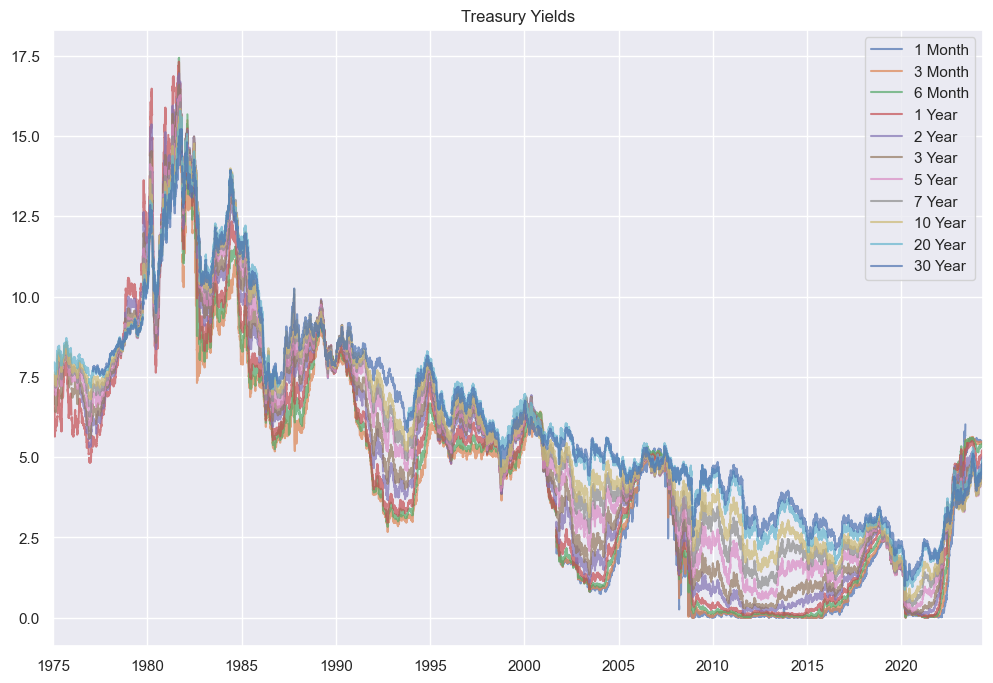

In [7]:
# Figure 1
yields.plot(figsize=(12, 8), title='Treasury Yields', alpha=0.7) # Plot the yields
plt.show()

U.S. Treasury yields spiked in 1982 due to high inflation and Volcker’s rate hikes, then trended downward for decades as inflation was controlled and global demand for safe assets rose. Post-2008, yields—especially short-term—fell to near zero due to the Fed’s zero-rate policy and persistent low growth expectations.


/var/folders/qk/0049fg855_5dzk88ykpjq8_r0000gn/T/ipykernel_89457/3089012527.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bear_flattening = yields['2004-06-01':'2006-06-30'].resample('3M').last()
/var/folders/qk/0049fg855_5dzk88ykpjq8_r0000gn/T/ipykernel_89457/3089012527.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bull_flattening = yields['2010-01-01':'2012-06-30'].resample('4M').last()


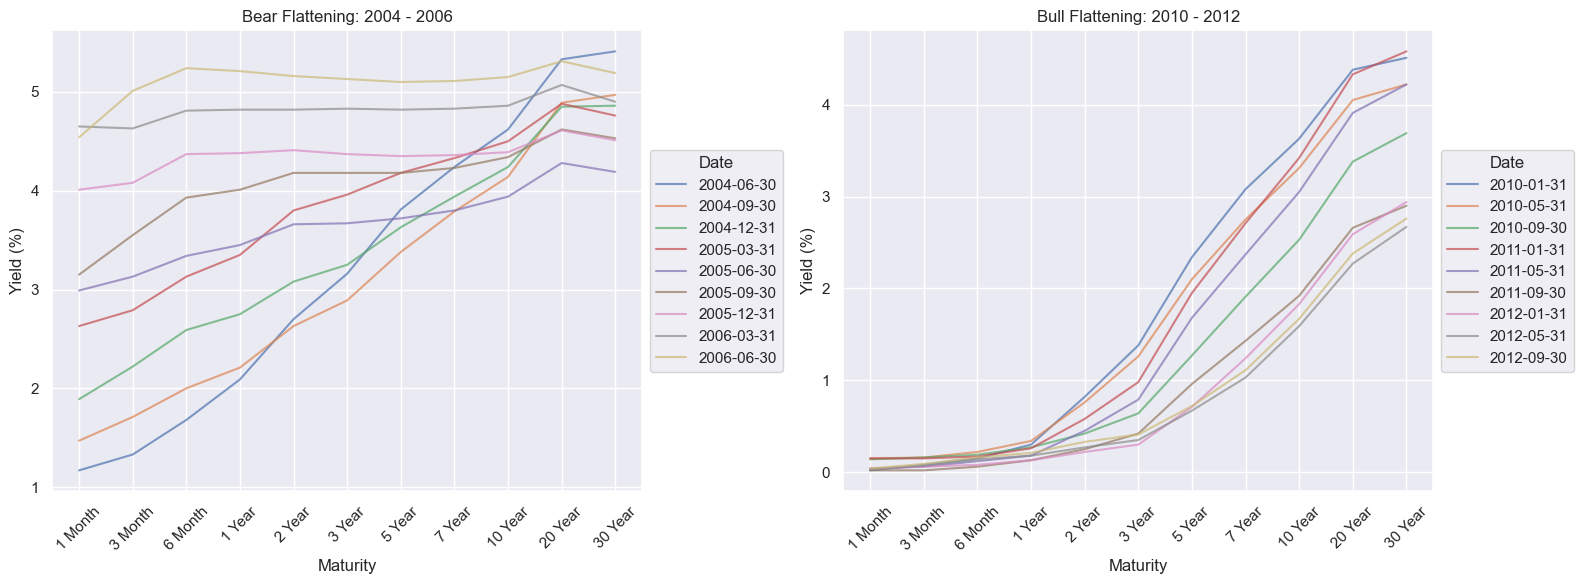

In [9]:
# Preparing the data
bear_flattening = yields['2004-06-01':'2006-06-30'].resample('3M').last()
bear_flattening.index = bear_flattening.index.strftime('%Y-%m-%d')

bull_flattening = yields['2010-01-01':'2012-06-30'].resample('4M').last()
bull_flattening.index = bull_flattening.index.strftime('%Y-%m-%d')

# Creating the plt object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bear flattening graph
for i in range(len(bear_flattening)):
    date = bear_flattening.index[i]
    ax1.plot(bear_flattening.columns, bear_flattening.iloc[i, :], alpha=0.7, label=date)
ax1.set_title('Bear Flattening: 2004 - 2006')
ax1.set_xlabel('Maturity')
ax1.set_ylabel('Yield (%)')
ax1.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax1.tick_params(axis='x', rotation=45)

# Bull flattening graph
for i in range(len(bull_flattening)):
    date = bull_flattening.index[i]
    ax2.plot(bull_flattening.columns, bull_flattening.iloc[i, :], alpha=0.7, label=date)
ax2.set_title('Bull Flattening: 2010 - 2012')
ax2.set_xlabel('Maturity')
ax2.set_ylabel('Yield (%)')
ax2.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/var/folders/qk/0049fg855_5dzk88ykpjq8_r0000gn/T/ipykernel_89457/3731963308.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bull_steepening = yields['2008-01-01':'2009-06-30'].resample('3M').last()
/var/folders/qk/0049fg855_5dzk88ykpjq8_r0000gn/T/ipykernel_89457/3731963308.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bear_steepening = yields['2021-01-01':'2021-12-31'].resample('3M').last()


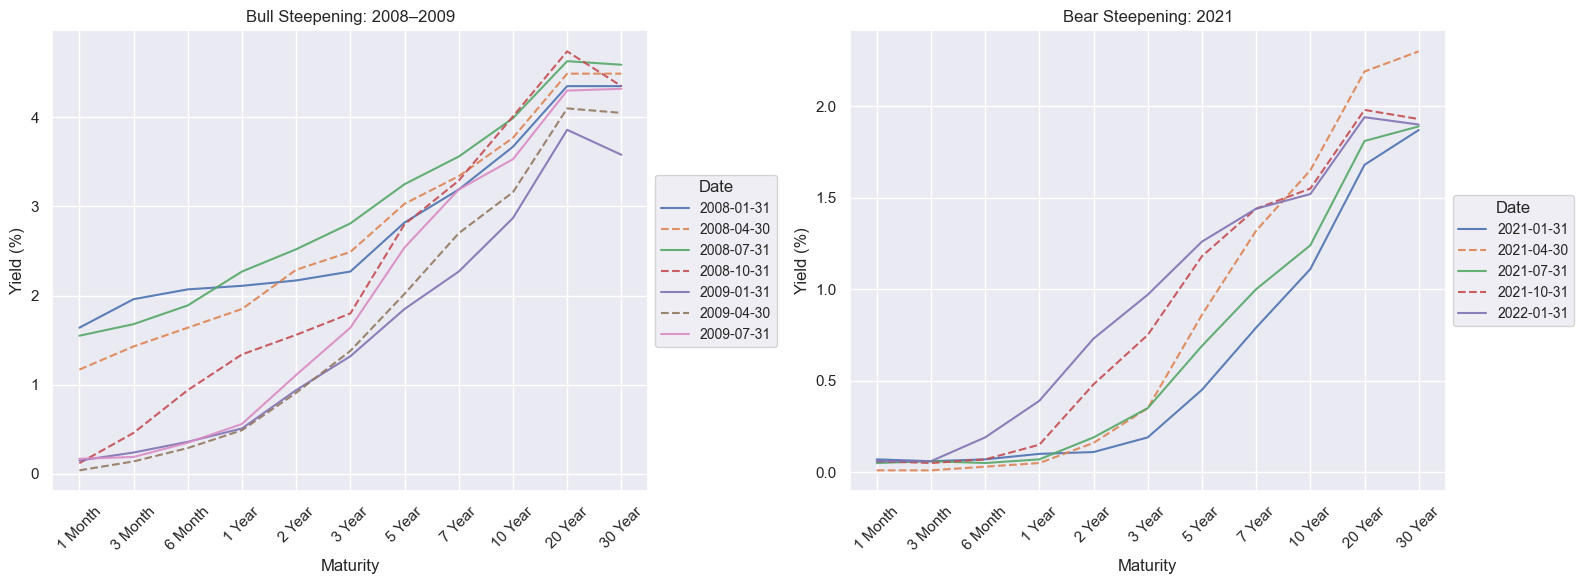

In [14]:
# Bull and Bear Steepening Periods
bull_steepening = yields['2008-01-01':'2009-06-30'].resample('3M').last()
bull_steepening.index = bull_steepening.index.strftime('%Y-%m-%d')
bear_steepening = yields['2021-01-01':'2021-12-31'].resample('3M').last()
bear_steepening.index = bear_steepening.index.strftime('%Y-%m-%d')
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Bull Steepening Plot (2008–2009)
for i, date in enumerate(bull_steepening.index):
    ax1.plot(bull_steepening.columns, bull_steepening.iloc[i],label=date, linestyle='--' if i%2 else '-', alpha=0.9)
ax1.set_title('Bull Steepening: 2008–2009')
ax1.set_xlabel('Maturity')
ax1.set_ylabel('Yield (%)')
ax1.legend(title='Date', fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
ax1.tick_params(axis='x', rotation=45)
# Bear Steepening Plot (2021)
for i, date in enumerate(bear_steepening.index):
    ax2.plot(bear_steepening.columns, bear_steepening.iloc[i],label=date, linestyle='--' if i%2 else '-', alpha=0.9)
ax2.set_title('Bear Steepening: 2021')
ax2.set_xlabel('Maturity')
ax2.set_ylabel('Yield (%)')
ax2.legend(title='Date', fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## YIELD CURVE

Figure 3


/var/folders/qk/0049fg855_5dzk88ykpjq8_r0000gn/T/ipykernel_89457/4173686549.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


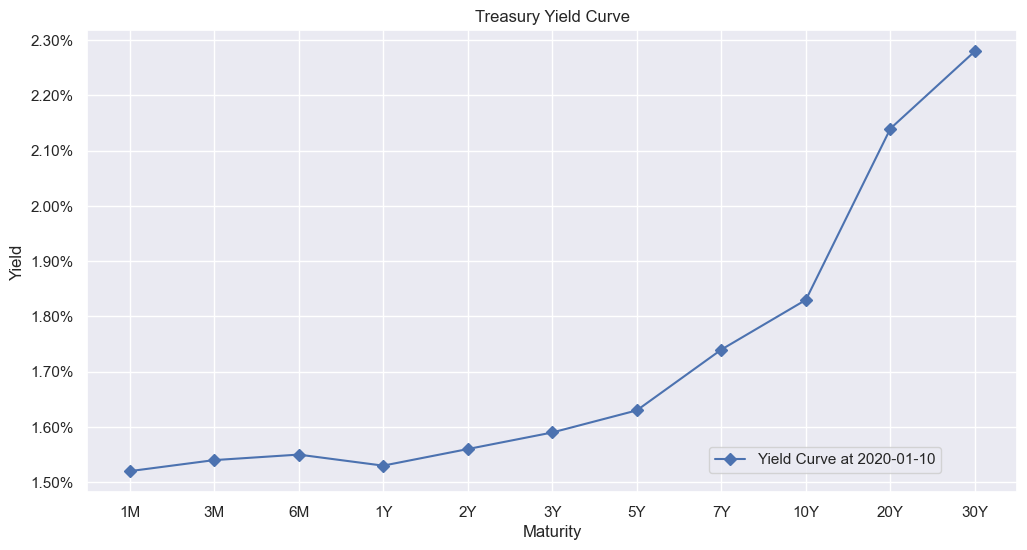

In [16]:
def plot_yield_curve(date, fig_n):
    maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title(fig_n+'Treasury Yield Curve')


    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

print("Figure 3")
plot_yield_curve('2020-01-10', '')

### **Nelson Siegel Model**
The **Nelson Siegel model (NS model)** is a popular model for describing the relationship between maturity and yield (Svensson). Here is the formula for the model:

$$y(t)=\beta_{0}+\beta_{1}\left( \frac{1-e^{-\lambda t}}{\lambda t} \right)+\beta_{2}\left( \frac{1-e^{^{-\lambda t}}}{\lambda t}-e^{-\lambda t} \right)+\epsilon$$
$\beta_0$, $\beta_1$, $\beta_2$ are the parameters to be estimated. $t$ is the time to maturity and $\lambda$ is the decay rate. The decay rate is between 0 and 1. $\beta_{0}$ is used to describe the level of the yield curve. $\beta_{1}$ is used to describe the slope of the yield curve and $\beta_{2}$ is used to describe the shape of the yield curve. For this reason, we also call the NS model a **yield curve factor model**. The NS model decomposes the yield curve into three elements as described

In [19]:
# Import the packages for fitting NS model
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np

In [20]:
# Create maturity and yield variables in array form
maturities_in_years = np.array([1/12, 0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30])
y = np.array(yields.loc["2020-01-10"])

NelsonSiegelCurve(beta0=2.6376809660853486, beta1=-1.102586035140139, beta2=-1.1406472748624015, tau=4.75001743443502)


Text(0.5, 1.0, 'NS Model Result')

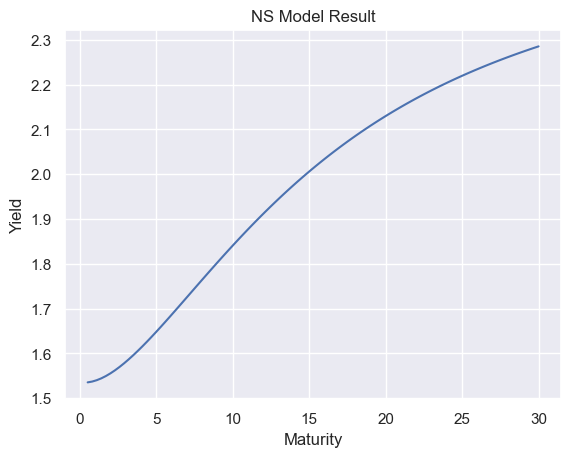

In [23]:
# Fit an NS model for yields from 2020-01-10
curve, status = calibrate_ns_ols(maturities_in_years, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)
# Plot the results
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("NS Model Result")